In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# pip install seaborn

In [5]:
df = pd.read_csv("refined_dataset.csv")
df.head()

,Formula,Dosef,Hform,Natoms,Mass,Energy,Smax,Fmax,Volume,Gap_wo_soc,Bandgap
0,Al4Se6,0.0,-0.833,10,581.752,-44.175,0.0,0.007,808.565,1.529,1.524
1,Co2Se3,0.0,-0.255,5,354.779,-28.180,0.0,0.009,350.801,0.257,0.255
2,Ga4Se6,0.0,-0.523,10,752.718,-37.736,0.0,0.007,733.692,0.529,0.405
3,Rh4S6,0.0,-0.450,10,603.982,-57.557,0.0,0.007,425.002,0.553,0.440
4,Tl8Cl12,0.0,-0.864,20,2060.440,-58.691,0.0,0.009,2311.767,1.915,1.915


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3633 entries, 0 to 3632
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Formula     3633 non-null   object 
 1   Dosef       3633 non-null   float64
 2   Hform       3633 non-null   float64
 3   Natoms      3633 non-null   int64  
 4   Mass        3633 non-null   float64
 5   Energy      3633 non-null   float64
 6   Smax        3633 non-null   float64
 7   Fmax        3633 non-null   float64
 8   Volume      3633 non-null   float64
 9   Gap_wo_soc  3633 non-null   float64
 10  Bandgap     3633 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 312.3+ KB


In [23]:
#df.drop([330, 331], axis = 0)
df.isnull().sum()

Formula       0
Dosef         0
Hform         0
Natoms        0
Mass          0
Energy        0
Smax          0
Fmax          0
Volume        0
Gap_wo_soc    0
Bandgap       0
dtype: int64

In [9]:
y = df['Bandgap']
# df = df.drop('Bandgap', axis = 1)
df = df.drop('Formula',axis = 1)

In [10]:
df

,Dosef,Hform,Natoms,Mass,Energy,Smax,Fmax,Volume,Gap_wo_soc,Bandgap
0,0.000,-0.833,10,581.752,-44.175,0.000,0.007,808.565,1.529,1.524
1,0.000,-0.255,5,354.779,-28.180,0.000,0.009,350.801,0.257,0.255
2,0.000,-0.523,10,752.718,-37.736,0.000,0.007,733.692,0.529,0.405
3,0.000,-0.450,10,603.982,-57.557,0.000,0.007,425.002,0.553,0.440
4,0.000,-0.864,20,2060.440,-58.691,0.000,0.009,2311.767,1.915,1.915
...,...,...,...,...,...,...,...,...,...,...
3628,6.667,-0.559,10,739.906,-69.801,0.000,0.008,799.677,0.000,0.000
3629,0.000,-0.900,20,632.968,-113.032,0.002,0.009,1366.613,0.302,0.218
3630,0.000,-0.170,14,743.332,-53.589,0.000,0.010,1596.233,1.980,1.960
3631,0.000,-1.673,18,945.628,-123.346,0.000,0.010,1014.236,3.512,3.405


<Axes: >

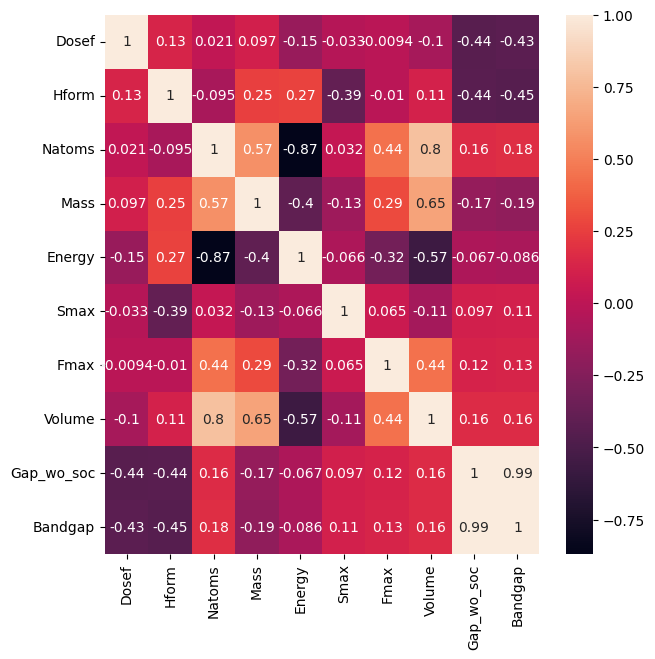

In [11]:
plt.figure(figsize=(7, 7), dpi = 100)
sns.heatmap(df.corr(), annot=True)

<Axes: >

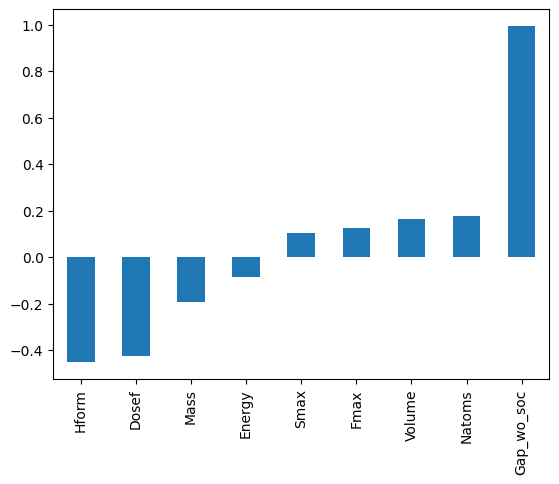

In [12]:
# Correlation bar graph
df.corr()['Bandgap'][:-1].sort_values().plot(kind = 'bar')

# SVR (support vector Regression) for 8 features

svr_model1 for 8 features
and
svr_model2 for 9 features

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/major_project_endsem/refined_dataset.csv")

from sklearn.model_selection import train_test_split
X = df.drop(['Gap_wo_soc','Bandgap', 'Formula'],axis = 1)
y = df['Bandgap']
X_temp, X_final_test, y_temp, y_final_test = train_test_split(X, y, test_size=0.15, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.15, random_state=101)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr_model1 = SVR()
grid_param = {'C':[0.001, 0.01, 0.1, 0.5, 1, 10, 50], 'gamma':['scale', 'auto'], 'epsilon':[0, 0.001, 0.1, 1, 10, 50]}
svr1_grid_model = GridSearchCV(svr_model1, grid_param, cv = 4)
svr1_grid_model.fit(X_train, y_train)
svr1_grid_model.best_params_
svr1_pred = svr1_grid_model.predict(X_test)
print(svr1_grid_model.best_params_)


{'C': 50, 'epsilon': 0, 'gamma': 'auto'}


error metrics for svr1

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, svr1_pred)
RMSE = np.sqrt(mean_squared_error(y_test, svr1_pred))
print(MAE, RMSE)

from sklearn.metrics import r2_score
r2score = r2_score(y_test, svr1_pred)
print("R-squared (R2) Score:", r2score)

0.405563308736859 0.6540677167599696
R-squared (R2) Score: 0.7081142281824802


graph for svr1

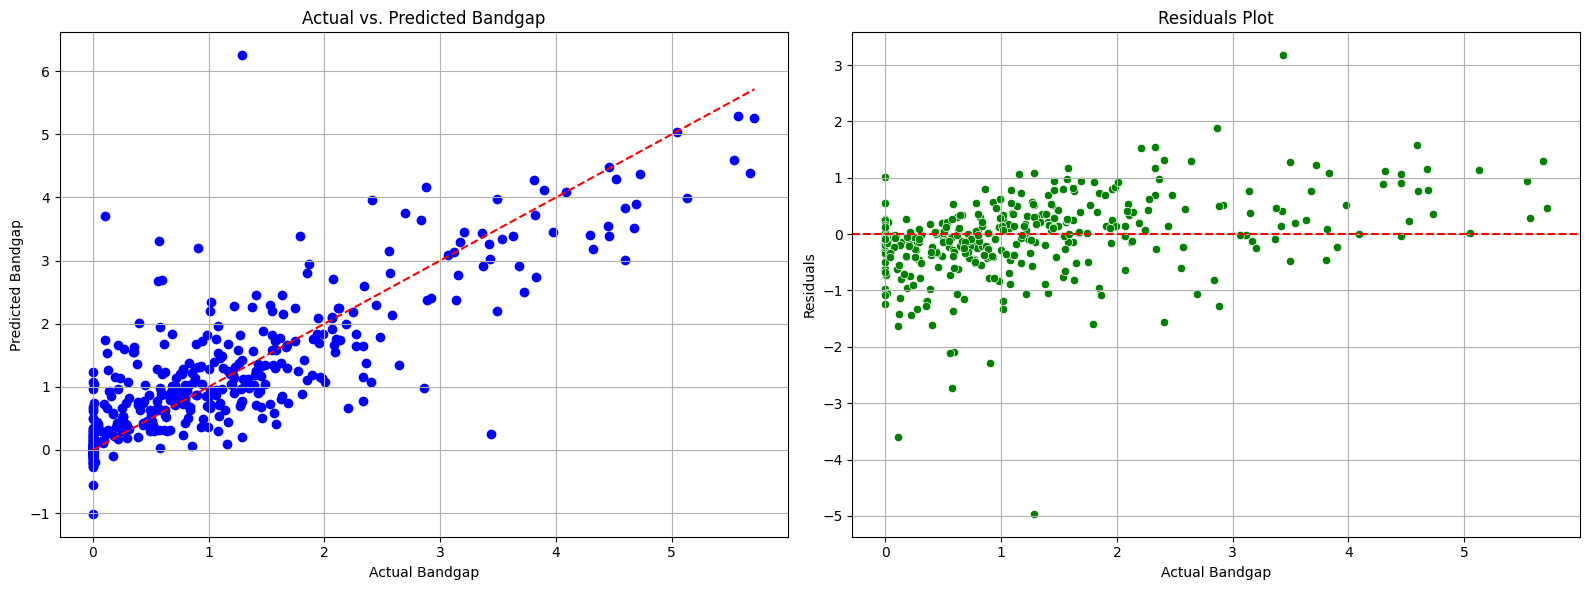

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
test_residuals = y_test - svr1_pred

# Set up the plot
plt.figure(figsize=(16, 6))

# Subplot 1: Actual vs. Predicted Bandgap
plt.subplot(1, 2, 1)
plt.scatter(y_test, svr1_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.title('Actual vs. Predicted Bandgap')
plt.xlabel('Actual Bandgap')
plt.ylabel('Predicted Bandgap')
plt.grid(True)

# Subplot 2: Residuals Plot with Seaborn
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=test_residuals, color='green')
plt.axhline(y=0, linestyle='--', color='red')
plt.title('Residuals Plot')
plt.xlabel('Actual Bandgap')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

# SVR code for 9 features

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/major_project_endsem/cleaned_dataset.csv")
X = df.drop(['Bandgap','Formula'] ,axis = 1)
y = df['Bandgap']

from sklearn.model_selection import train_test_split
X_temp, X_final_test, y_temp, y_final_test = train_test_split(X, y, test_size=0.15, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.15, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr_model2 = SVR()
grid_params = {'C':[0.001, 0.01, 0.1, 0.5, 1, 10, 50], 'gamma':['scale', 'auto'], 'epsilon':[0, 0.001, 0.1, 1, 10, 50]}
svr2_grid_model = GridSearchCV(svr_model2, grid_params, cv = 6)
svr2_grid_model.fit(X_train, y_train)
svr2_pred = svr2_grid_model.predict(X_test)
print(svr2_grid_model.best_params_)

{'C': 50, 'epsilon': 0, 'gamma': 'auto'}


metrics for svr2

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, svr2_pred)
RMSE = np.sqrt(mean_squared_error(y_test, svr2_pred))
from sklearn.metrics import r2_score
r2score = r2_score(y_test, svr2_pred)
print("R-squared (R2) Score:", r2score)
print("MAE", MAE, 'RMSE', RMSE)

graphs for svr2 model

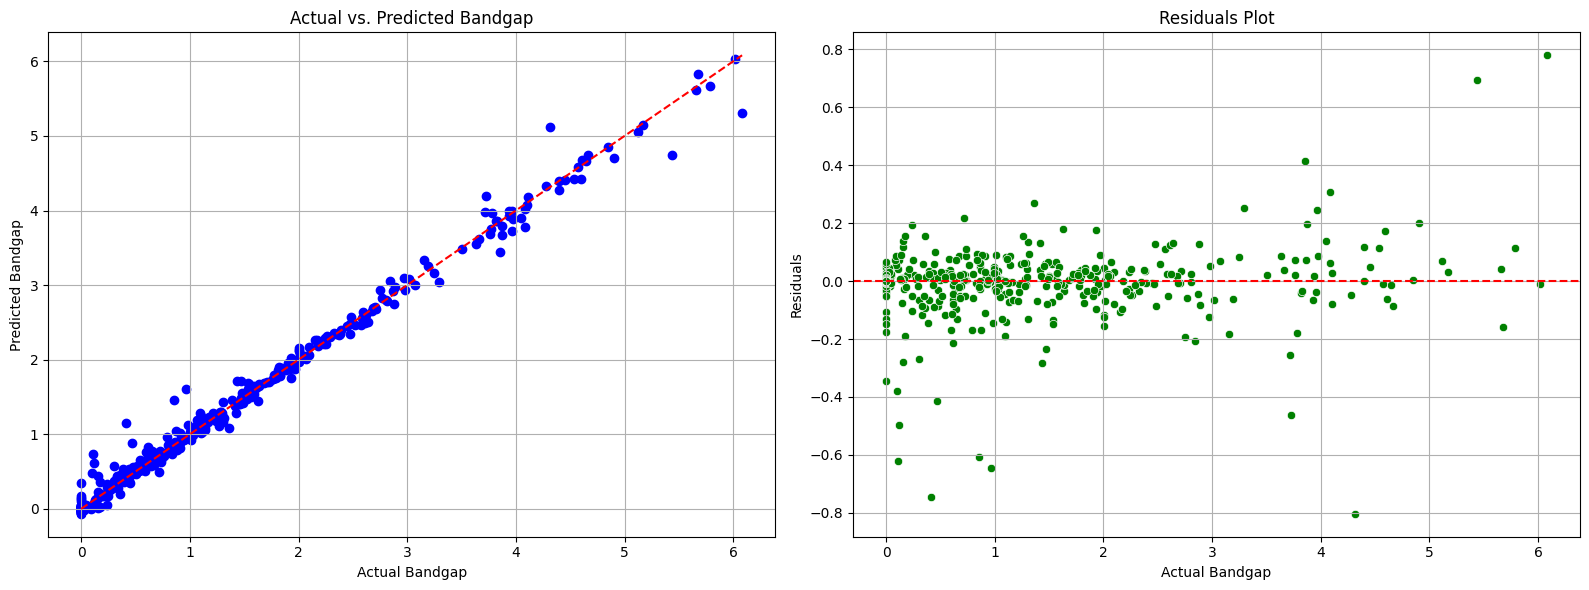

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
test_residuals = y_test - predictions

# Set up the plot
plt.figure(figsize=(16, 6))

# Subplot 1: Actual vs. Predicted Bandgap
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.title('Actual vs. Predicted Bandgap')
plt.xlabel('Actual Bandgap')
plt.ylabel('Predicted Bandgap')
plt.grid(True)

# Subplot 2: Residuals Plot with Seaborn
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=test_residuals, color='green')
plt.axhline(y=0, linestyle='--', color='red')
plt.title('Residuals Plot')
plt.xlabel('Actual Bandgap')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

# RF ( Random Forect) with 8 features

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("refined_dataset.csv")
X = df.drop(['Bandgap','Formula','Gap_wo_soc'] ,axis = 1)
y = df['Bandgap']

from sklearn.model_selection import train_test_split
X_temp, X_final_test, y_temp, y_final_test = train_test_split(X, y, test_size=0.15, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.15, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf_model1 = RandomForestRegressor()
grid_param = {'n_estimators':[64, 100, 124, 200],
             'max_depth':[9, 15, 25],
             'min_samples_split':[3, 5, 6],
             'bootstrap':[True, False]}
rf1_grid_model = GridSearchCV(rf_model1, grid_param, cv = 4)
rf1_grid_model.fit(X_train, y_train)
rf1_pred = rf1_grid_model.predict(X_test)
print(rf1_grid_model.best_params_)


{'bootstrap': True, 'max_depth': 25, 'min_samples_split': 3, 'n_estimators': 64}


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, rf1_pred)
RMSE = np.sqrt(mean_squared_error(y_test, rf1_pred))
from sklearn.metrics import r2_score
r2score = r2_score(y_test, rf1_pred)
print("R-squared (R2) Score:", r2score)
print("MAE", MAE, 'RMSE', RMSE)

R-squared (R2) Score: 0.728264481295384
MAE 0.3732106290253987 RMSE 0.6310873219991161


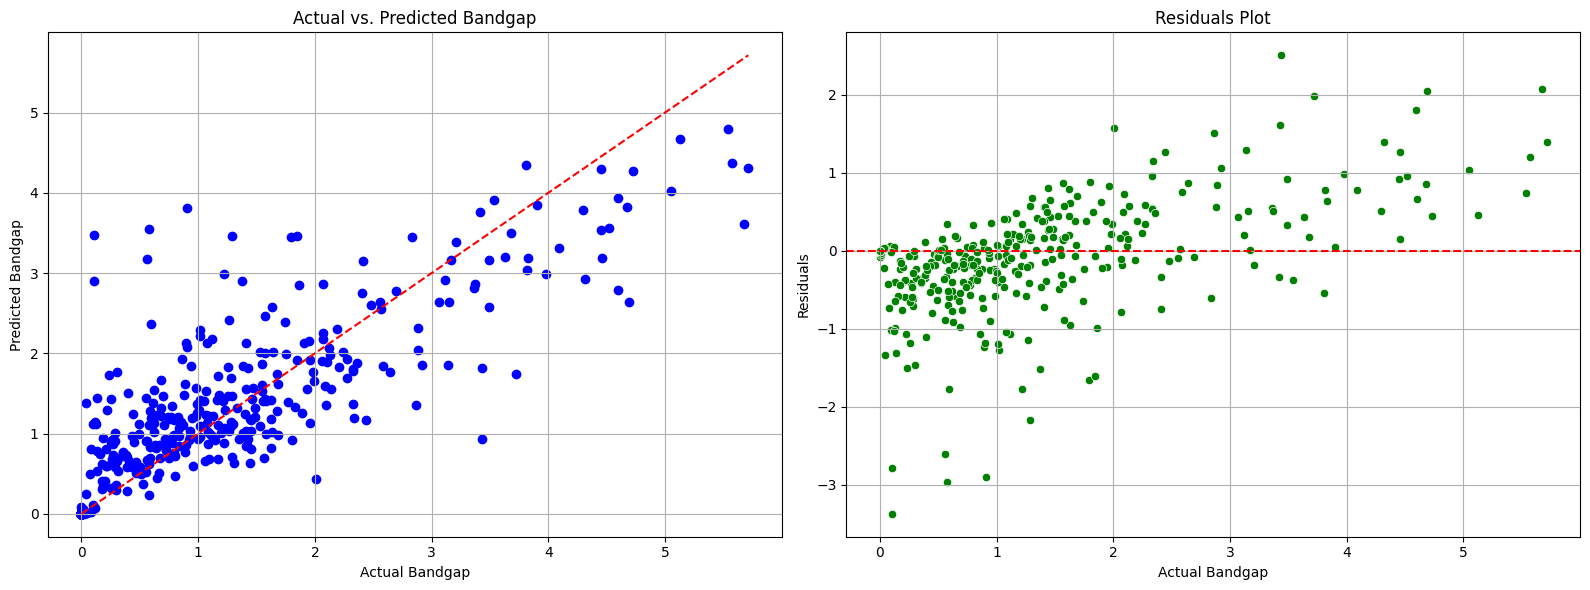

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
test_residuals = y_test - rf1_pred

# Set up the plot
plt.figure(figsize=(16, 6))

# Subplot 1: Actual vs. Predicted Bandgap
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf1_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.title('Actual vs. Predicted Bandgap')
plt.xlabel('Actual Bandgap')
plt.ylabel('Predicted Bandgap')
plt.grid(True)

# Subplot 2: Residuals Plot with Seaborn
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=test_residuals, color='green')
plt.axhline(y=0, linestyle='--', color='red')
plt.title('Residuals Plot')
plt.xlabel('Actual Bandgap')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

# RF with SOC

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("cleaned_dataset.csv")
X = df.drop(['Bandgap','Formula'] ,axis = 1)
y = df['Bandgap']

from sklearn.model_selection import train_test_split
X_temp, X_final_test, y_temp, y_final_test = train_test_split(X, y, test_size=0.15, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.15, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf_model2 = RandomForestRegressor()
grid_param = {'n_estimators':[64, 100, 124, 200],
             'max_depth':[9, 15, 25],
             'min_samples_split':[3, 5, 6],
             'bootstrap':[True, False]}
rf2_grid_model = GridSearchCV(rf_model2, grid_param, cv = 4)
rf2_grid_model.fit(X_train, y_train)
rf2_pred = rf2_grid_model.predict(X_test)
print(rf2_grid_model.best_params_)


{'bootstrap': True, 'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 64}


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, rf2_pred)
RMSE = np.sqrt(mean_squared_error(y_test, rf2_pred))
from sklearn.metrics import r2_score
r2score = r2_score(y_test, rf2_pred)
print("R-squared (R2) Score:", r2score)
print("MAE", MAE, 'RMSE', RMSE)

R-squared (R2) Score: 0.9928864601879307
MAE 0.06284346275211417 RMSE 0.1132265101972564


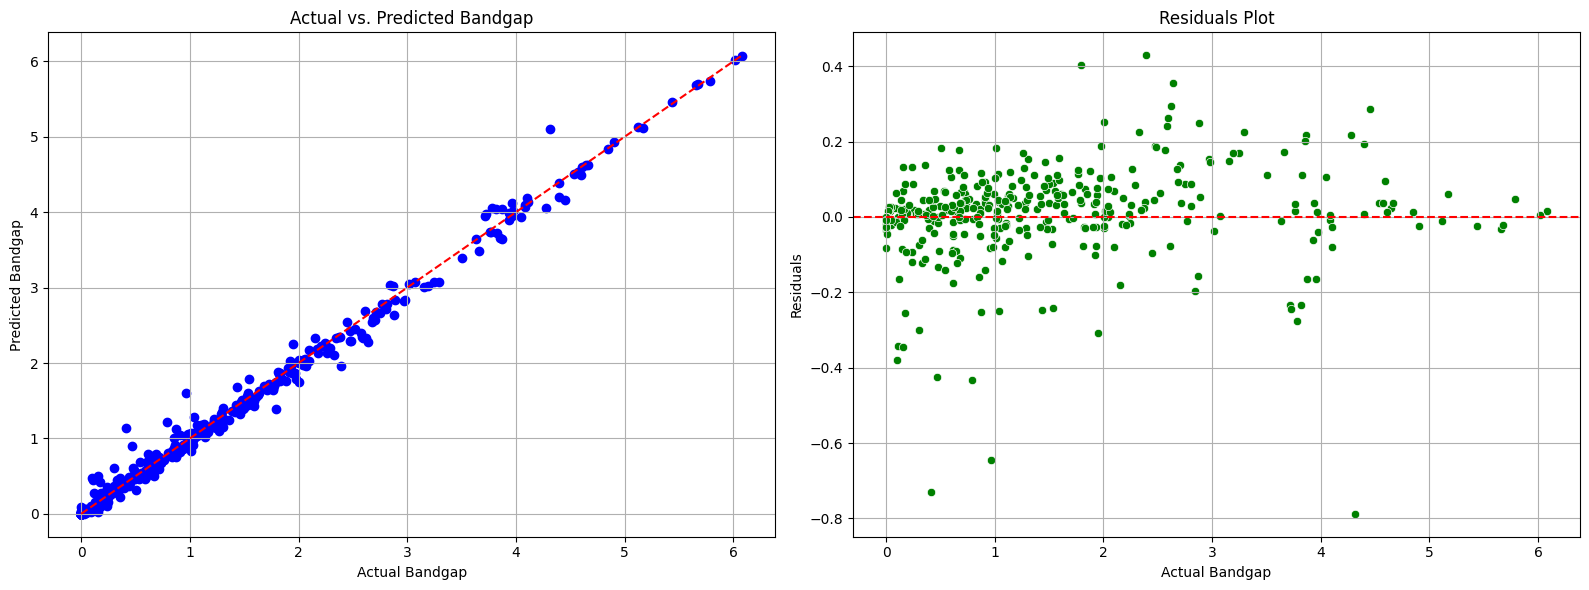

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
test_residuals = y_test - rf2_pred

# Set up the plot
plt.figure(figsize=(16, 6))

# Subplot 1: Actual vs. Predicted Bandgap
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf2_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.title('Actual vs. Predicted Bandgap')
plt.xlabel('Actual Bandgap')
plt.ylabel('Predicted Bandgap')
plt.grid(True)

# Subplot 2: Residuals Plot with Seaborn
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=test_residuals, color='green')
plt.axhline(y=0, linestyle='--', color='red')
plt.title('Residuals Plot')
plt.xlabel('Actual Bandgap')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

SVM for with soc

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("refined_dataset.csv")
X = df.drop(['Bandgap','Formula'] ,axis = 1)
y = df['Bandgap']

from sklearn.model_selection import train_test_split
X_temp, X_final_test, y_temp, y_final_test = train_test_split(X, y, test_size=0.15, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.15, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr_model = SVR()
grid_params = {'C':[0.001, 0.01, 0.1, 0.5, 1, 10, 50], 'gamma':['scale', 'auto'], 'epsilon':[0, 0.001, 0.1, 1, 10, 50]}
grid_model = GridSearchCV(svr_model, grid_params, cv = 6)
grid_model.fit(X_train, y_train)
predictions = grid_model.predict(X_test)
print(grid_model.best_params_)

from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, predictions)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
from sklearn.metrics import r2_score
r2score = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2score)
print("MAE", MAE, 'RMSE', RMSE)

{'C': 50, 'epsilon': 0.001, 'gamma': 'scale'}
R-squared (R2) Score: 0.9896541252356154
MAE 0.05982402460789711 RMSE 0.12314020143038906


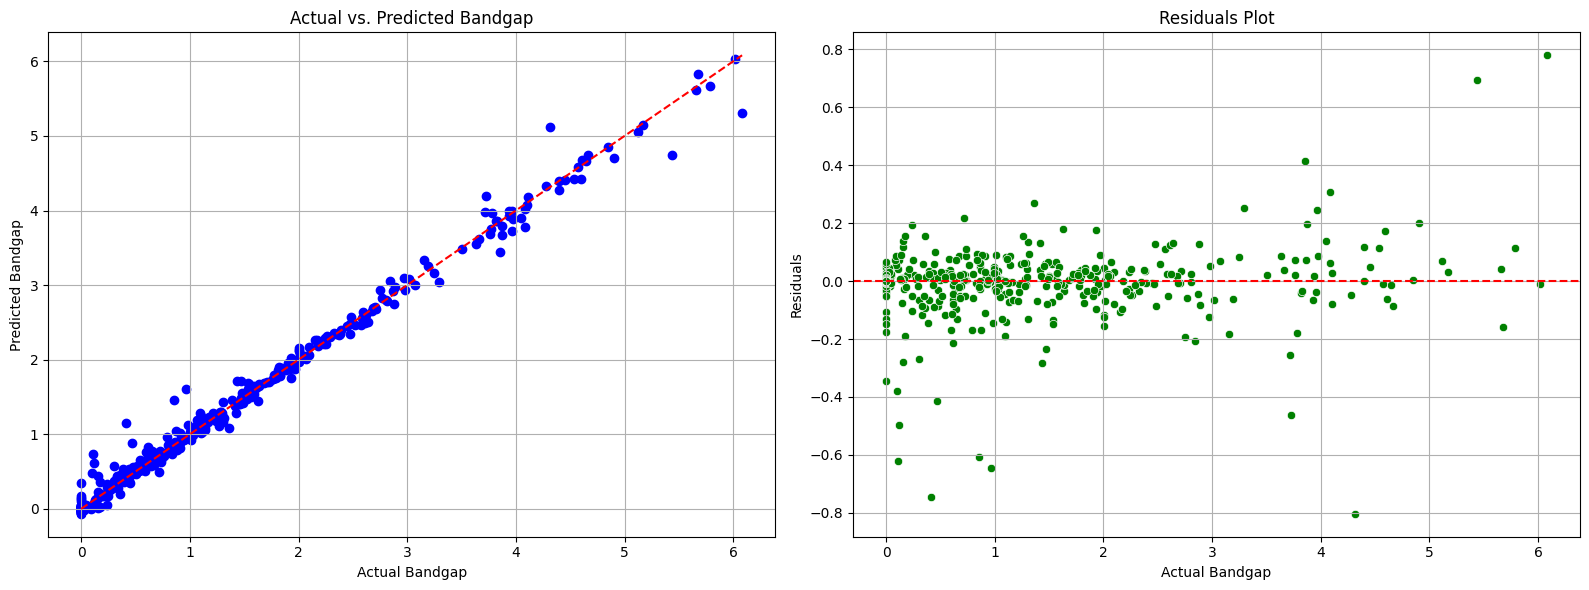

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
test_residuals = y_test - predictions

# Set up the plot
plt.figure(figsize=(16, 6))

# Subplot 1: Actual vs. Predicted Bandgap
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.title('Actual vs. Predicted Bandgap')
plt.xlabel('Actual Bandgap')
plt.ylabel('Predicted Bandgap')
plt.grid(True)

# Subplot 2: Residuals Plot with Seaborn
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=test_residuals, color='green')
plt.axhline(y=0, linestyle='--', color='red')
plt.title('Residuals Plot')
plt.xlabel('Actual Bandgap')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()